## 영상의 기하학적 변환

어파인 변환\
영상의 평행이동, 확대 및 축소, 회전 등의 기하학적 변환\

리사이즈\ => 보통 배열 사이즈가 다르기때문에 일정 사이즈에 맞춰주기 위해서 씀\
cv2.resize(img,dsize,fx,fy,interpolation)\
img-image\
dsize-(가로,세로)\
fx- 가로사이즈의 배수. 2배로 크게하려면 2, 반으로 줄이려면 0.5]\
fy - 세로사이즈의 배수\
interpolation- 보간법. 크기 조절시 픽셀 처리방법 지정

In [6]:
import cv2 
import numpy as np

img = cv2.imread('c.jpg')
h,w,c = img.shape

# cv2.INTER_AREA 축소에 적합한 보간법
shrink = cv2.resize(img,None,fx=0.5,fy=0.5, interpolation=cv2.INTER_AREA)

# cv2.INTER_CUBIC 3차 보간법=> 고화질=> 확대
zoom1 = cv2.resize(img,(w*2,h*2),interpolation=cv2.INTER_CUBIC)

# 배수 size 지정
zoom2 = cv2.resize(img,None,fx=2,fy=2, interpolation=cv2.INTER_CUBIC)

cv2.imshow('originial',img)

cv2.imshow('zoom2',zoom2)
cv2.imshow('zoom1',zoom1)
cv2.imshow('shrink',shrink)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 위치 변환\
cv2.warpAffine(src,M,dsize)\
src - image\
M-변환행렬\
dsize-(가로,세로)

In [27]:
import cv2 
import numpy as np

img = cv2.imread('c.jpg')
h,w,c = img.shape

# 변환 행렬, X축으로 100, y축으로 200 이동
# 행렬연산을 숙지할것!
M = np.float32([[1,0,-500],[0,1,200]])

dst = cv2.warpAffine(img,M,(w,h))

cv2.imshow('Original',img)
cv2.imshow('Translation',dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 이미지 회전 \
cv2.getRotationMatrix2D(center,angle,scale)\
center- 이미지의 중심 좌표 \
angle- 회전 각도 \
scale - 이미지 변환 크기 

In [28]:
#회전하려면 중심점이 필요하다 =>
# 이미지의 중심점을 기준으로 90도 회전 , 방향은? 
# 방향은 반시계방향
# 하지만 음수로 하면 시계방향
import cv2 

img = cv2.imread('c.jpg')

h,w,c = img.shape

M = cv2.getRotationMatrix2D((w/2,h/2),-90,0.5)

dst = cv2.warpAffine(img,M,(w,h))

cv2.imshow('Original',img)
cv2.imshow('Rotation',dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

대칭변환\
이미지를 좌우, 상하로 반전 

cv2.flip(img,mode)\
mode - 1은 좌우, 0은 상하반전


In [29]:
import cv2 

img = cv2.imread('c.jpg')

# 좌우반전
img1 = cv2.flip(img,1)
# 상하반전
img2 = cv2.flip(img,0)

cv2.imshow('img',img)
cv2.imshow('img1',img1)
cv2.imshow('img2',img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 투시변환\
Affine Transformation\
선의 평행성은 유지가 되면서 이미지를 변환하는 작업

무작위한 이미지를, 규격화 시키는데 중요할것 같다

C:\Users\yng12\anaconda3\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


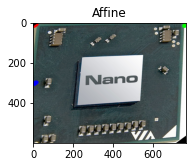

In [33]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('nano.jpg')
h,w,c = img.shape

#matplotlib 으로 출력 위해서 bgr => rgb
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

pts1 = np.float32([[0,290],[380,10],[200,410]])
pts2 = np.float32([[10,10],[760,10],[10,300]])
# pts1의 좌표에 표시 .affine변환후 이동 점 확인.
cv2.circle(img,(0,290),10,(255,0,0),-1) #빨간점
cv2.circle(img,(380,10),10,(0,255,0),-1) # 그린점
cv2.circle(img,(200,410),10,(0,0,255),-1) # 파란점

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(w,h))

plt.subplot(121), plt.imshow(img), plt.title('image')
plt.subplot(121), plt.imshow(dst), plt.title('Affine')
plt.show()

## 원근 변환 \
Perspective Transformation\
 변환 직선의 성질만 유지가 되고, 선의 평행성은 유지가 되지 않는 변환\
 
변환 행렬 생성 함수\
cv2.getPerspective Transform(입력 4개 좌표, 결과 4개 좌표)\
=> 변환 행렬 반환 M(3X3)\

원근 변환 함수 \
cv2.warpPerspective(img,M,(가로,세로))

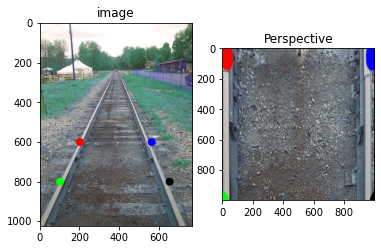

In [35]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('perspective.jpg')

#[x,y] 좌표점을 4x2의 행렬로 작성
# 좌표점은 좌상=>좌하=>우상=>우하
pts1 = np.float32([[200,600],[100,800],[560, 600],[650,800]])

#좌표의 이동점
pts2 = np.float32([[10,10],[10,1000],[1000,10],[1000,1000]])

#pts1 의 좌표에 표시. perspective 변환 후 이동 점 확인
cv2.circle(img,(200,600),20,(255,0,0),-1)
cv2.circle(img,(100,800),20,(0,255,0),-1)
cv2.circle(img,(560,600),20,(0,0,255),-1)
cv2.circle(img,(650,800),20,(0,0,0),-1)

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(1000,1000))

plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Perspective')
plt.show()